In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Plot images to see 

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

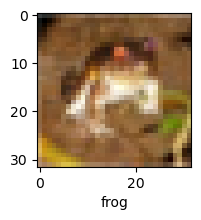

In [11]:
plot_sample(X_train, y_train, 0)

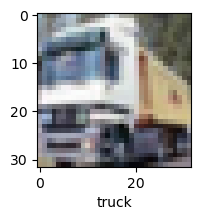

In [12]:
plot_sample(X_train, y_train, 1)

## Noramlizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Build simple artificial neural network for image classification

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 101s 64ms/step - loss: 1.8059 - accuracy: 0.3572
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6200 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5402 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4802 - accuracy: 0.4793
Epoch 5/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4306 - accuracy: 0.4950


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.65      0.54      1000
           1       0.75      0.29      0.42      1000
           2       0.27      0.57      0.37      1000
           3       0.38      0.27      0.31      1000
           4       0.49      0.25      0.33      1000
           5       0.44      0.33      0.38      1000
           6       0.56      0.45      0.50      1000
           7       0.56      0.51      0.53      1000
           8       0.69      0.52      0.59      1000
           9       0.43      0.72      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 16ms/step - loss: 1.4577 - accuracy: 0.4750
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1110 - accuracy: 0.6117
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9807 - accuracy: 0.6584
Epoch 4/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8959 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.8278 - accuracy: 0.7128
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7740 - accuracy: 0.7306
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7306 - accuracy: 0.7449
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6852 - accuracy: 0.7619
Epoch 9/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6446 - accuracy: 0.7749
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9380 - accuracy: 0.6929


[0.9380268454551697, 0.6929000020027161]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[7.3218024e-03, 3.1337854e-03, 1.4411687e-02, 6.7923218e-01,
        2.2030312e-03, 2.2978953e-01, 7.6663001e-03, 1.2932823e-03,
        5.2365683e-02, 2.5827033e-03],
       [2.8241096e-02, 7.7839953e-01, 3.7197584e-05, 9.4104043e-06,
        6.7834989e-08, 7.7906513e-08, 1.6884505e-05, 6.5917177e-08,
        1.9083153e-01, 2.4641040e-03],
       [5.3574499e-02, 3.6741415e-01, 1.0220734e-02, 5.0879084e-02,
        2.9583354e-02, 1.2565615e-03, 1.4020978e-03, 4.3090968e-03,
        4.5096421e-01, 3.0396199e-02],
       [9.7735196e-01, 1.4491202e-03, 2.3977505e-03, 8.8923502e-05,
        9.3288254e-04, 1.6134858e-06, 2.1153352e-05, 2.2796260e-06,
        1.7741375e-02, 1.3051543e-05],
       [1.1735699e-05, 3.5841240e-05, 4.6692390e-02, 2.2886891e-02,
        2.5443116e-01, 7.1828032e-04, 6.7517239e-01, 4.0259594e-05,
        2.9622818e-06, 8.0896179e-06]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

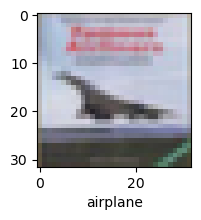

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

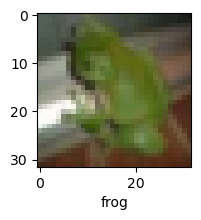

In [27]:
plot_sample(X_test, y_test,7)

In [28]:
classes[y_classes[7]]

'frog'

'truck'

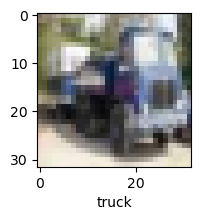

In [30]:
plot_sample(X_test, y_test,28)
classes[y_classes[28]]

'truck'

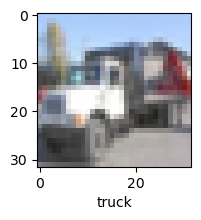

In [31]:
plot_sample(X_test, y_test,45)
classes[y_classes[45]]

'ship'

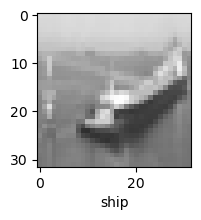

In [32]:
plot_sample(X_test, y_test,120)
classes[y_classes[120]]